<a href="https://colab.research.google.com/github/NaufalPratomo/PCVK_Ganjil_2025/blob/main/Modul9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

**Impor Library**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

**Tugas 3: Fungsi Dilasi Manual (Tanpa Library OpenCV)**

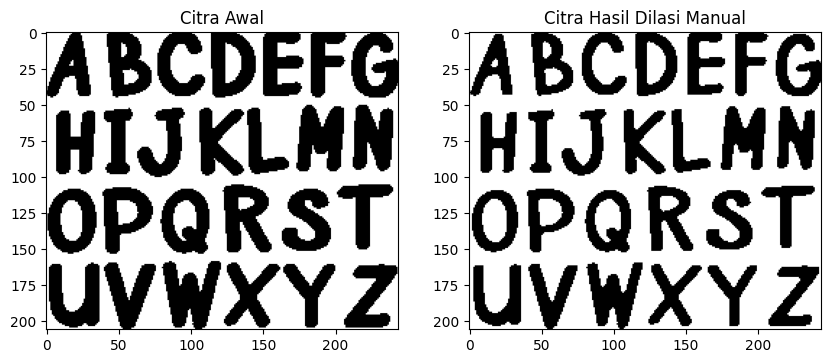

In [ ]:
path_morphology = 'morphology.png'

# 1. Baca dan proses gambar awal
img_morphology = cv2.imread(path_morphology, 0)
# Ubah ke citra biner (hitam/putih)
ret, thresh_morphology = cv2.threshold(img_morphology, 127, 255, cv2.THRESH_BINARY)

# 2. Definisikan Structuring Element (SE) cross 3x3
SED = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8)

# 3. Buat gambar kosong untuk menampung hasil dilasi
hasil_dilasi_manual = np.zeros_like(thresh_morphology)

# 4. Implementasi dilasi manual
# Padding untuk menangani piksel di tepi
padded_img = np.pad(thresh_morphology, pad_width=1, mode='constant', constant_values=0)

for i in range(thresh_morphology.shape[0]):
    for j in range(thresh_morphology.shape[1]):
        # Ambil area sekitar piksel saat ini yang seukuran SE
        region = padded_img[i:i+3, j:j+3]
        # Jika ada piksel putih di region yang bersesuaian dengan SE
        if np.any(np.logical_and(region == 255, SED == 1)):
            hasil_dilasi_manual[i, j] = 255

# 5. Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh_morphology, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(hasil_dilasi_manual, cmap='gray')
plt.title('Citra Hasil Dilasi Manual')
plt.show()

**Tugas 4: Dilasi dengan Library OpenCV**

Structuring Element (Kernel) Cross 3x3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]


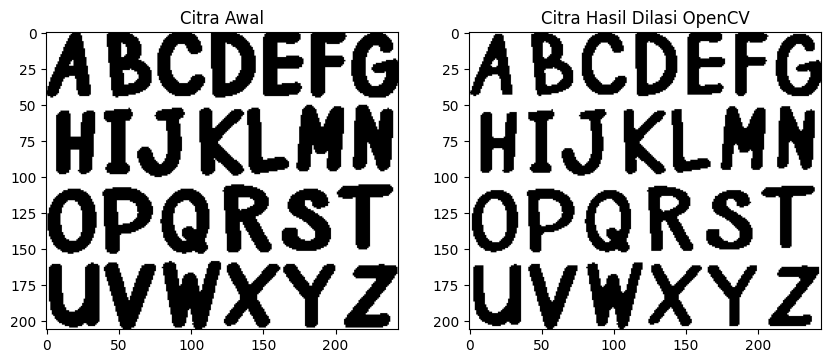

In [ ]:
# 1. Buat Structuring Element (SE) cross 3x3 menggunakan OpenCV
kernel_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
print("Structuring Element (Kernel) Cross 3x3:")
print(kernel_cross_3x3)

# 2. Lakukan operasi dilasi
hasil_dilasi_opencv = cv2.dilate(thresh_morphology, kernel_cross_3x3, iterations=1)

# 3. Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh_morphology, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(hasil_dilasi_opencv, cmap='gray')
plt.title('Citra Hasil Dilasi OpenCV')
plt.show()

**Tugas 5: Erosi Manual (Tanpa Library OpenCV)**

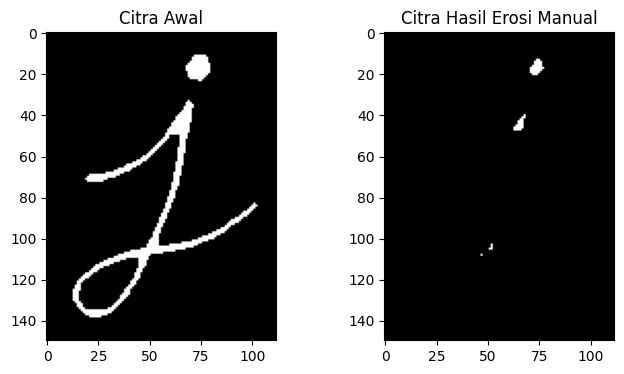

In [ ]:
path_j = 'j.png'

# 1. Baca gambar (sudah biner)
img_j = cv2.imread(path_j, 0)

# 2. Definisikan Structuring Element (SE) square 5x5
SES = np.ones((5, 5), dtype=np.uint8)

# 3. Buat gambar kosong untuk hasil erosi
hasil_erosi_manual = np.zeros_like(img_j)

# 4. Implementasi erosi manual
# Padding untuk menangani piksel di tepi (padding sebesar 2 untuk kernel 5x5)
padded_img_j = np.pad(img_j, pad_width=2, mode='constant', constant_values=0)

for i in range(img_j.shape[0]):
    for j in range(img_j.shape[1]):
        region = padded_img_j[i:i+5, j:j+5]
        # Cek apakah region ini "fit" atau cocok sempurna dengan SE
        if np.array_equal(np.logical_and(region, SES), SES):
             hasil_erosi_manual[i, j] = 255

# 5. Tampilkan hasil
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_j, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(hasil_erosi_manual, cmap='gray')
plt.title('Citra Hasil Erosi Manual')
plt.show()

**Tugas 6: Erosi dengan Library OpenCV**

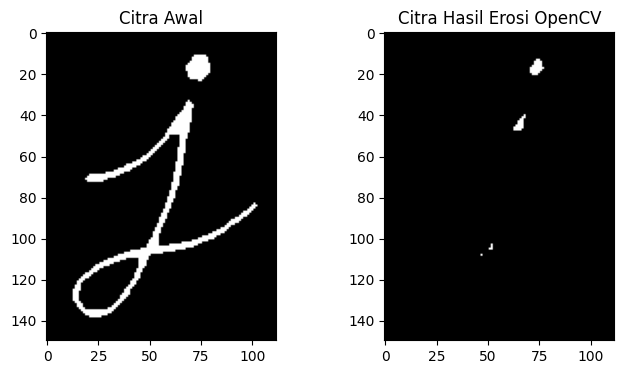

In [ ]:
# 1. Buat Structuring Element (SE) square 5x5
kernel_square_5x5 = np.ones((5, 5), np.uint8)
# atau: kernel_square_5x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# 2. Lakukan operasi erosi
hasil_erosi_opencv = cv2.erode(img_j, kernel_square_5x5, iterations=1)

# 3. Tampilkan hasil
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_j, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(hasil_erosi_opencv, cmap='gray')
plt.title('Citra Hasil Erosi OpenCV')
plt.show()

**Tugas 7: Operasi Opening**

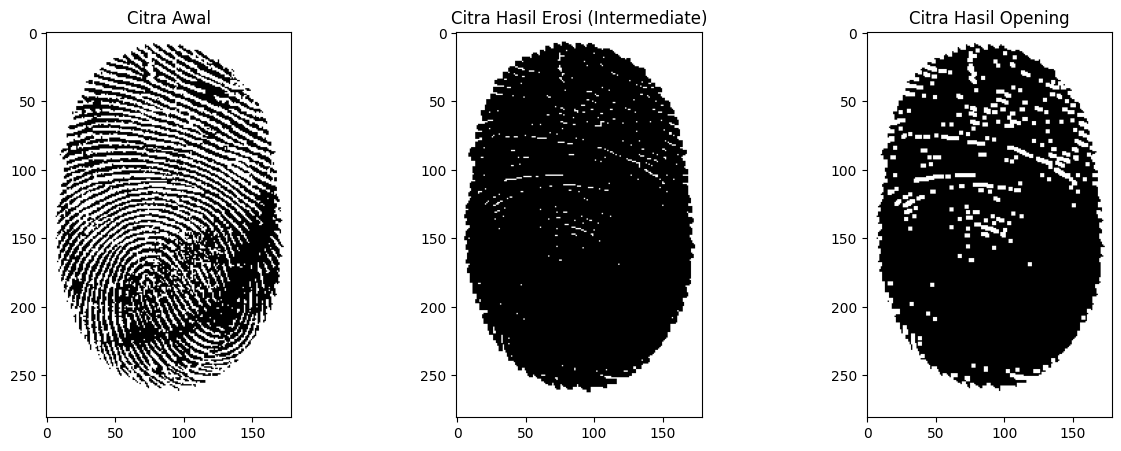

In [ ]:
path_fingerprint = 'fingerprint.png'

# 1. Baca gambar
img_fingerprint = cv2.imread(path_fingerprint, 0)
ret, thresh_fingerprint = cv2.threshold(img_fingerprint, 127, 255, cv2.THRESH_BINARY)


# 2. Definisikan SE square 3x3
kernel_square_3x3 = np.ones((3, 3), np.uint8)

# 3. Lakukan operasi opening
# Opening = Erosi -> Dilasi
eroded_fingerprint = cv2.erode(thresh_fingerprint, kernel_square_3x3, iterations=1)
hasil_opening = cv2.dilate(eroded_fingerprint, kernel_square_3x3, iterations=1)

# Cara langsung dengan cv2.morphologyEx()
# hasil_opening_cv = cv2.morphologyEx(thresh_fingerprint, cv2.MORPH_OPEN, kernel_square_3x3)

# 4. Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(thresh_fingerprint, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 3, 2)
plt.imshow(eroded_fingerprint, cmap='gray')
plt.title('Citra Hasil Erosi (Intermediate)')

plt.subplot(1, 3, 3)
plt.imshow(hasil_opening, cmap='gray')
plt.title('Citra Hasil Opening')
plt.show()

**Tugas 8: Operasi Closing**

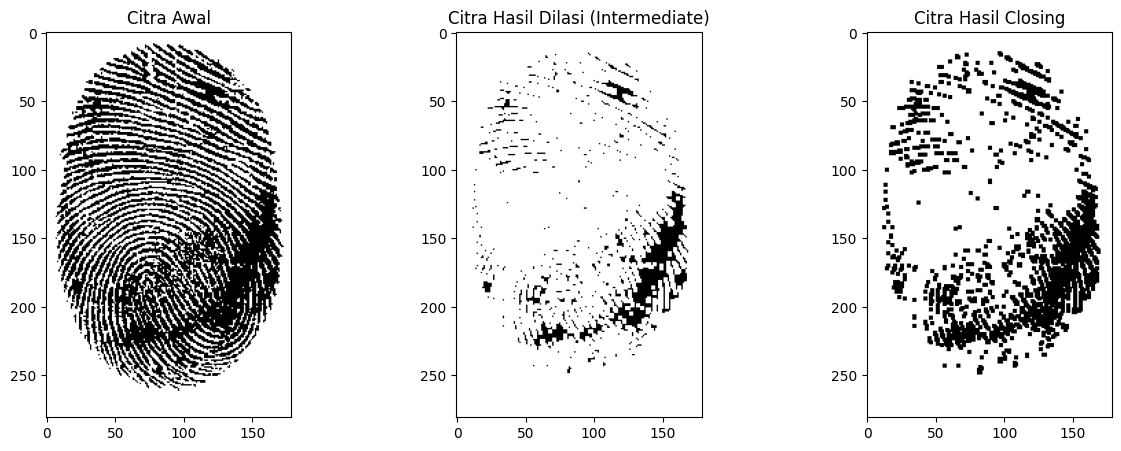

In [ ]:
# thresh_fingerprint

# 1. Definisikan SE square 3x3
kernel_square_3x3 = np.ones((3, 3), np.uint8)

# 2. Lakukan operasi closing
# Closing = Dilasi -> Erosi
dilated_fingerprint = cv2.dilate(thresh_fingerprint, kernel_square_3x3, iterations=1)
hasil_closing = cv2.erode(dilated_fingerprint, kernel_square_3x3, iterations=1)

# Cara langsung dengan cv2.morphologyEx()
# hasil_closing_cv = cv2.morphologyEx(thresh_fingerprint, cv2.MORPH_CLOSE, kernel_square_3x3)

# 3. Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(thresh_fingerprint, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 3, 2)
plt.imshow(dilated_fingerprint, cmap='gray')
plt.title('Citra Hasil Dilasi (Intermediate)')

plt.subplot(1, 3, 3)
plt.imshow(hasil_closing, cmap='gray')
plt.title('Citra Hasil Closing')
plt.show()

**Tugas 9: Dilasi dengan SE Cross (3x3 dan 5x5)**

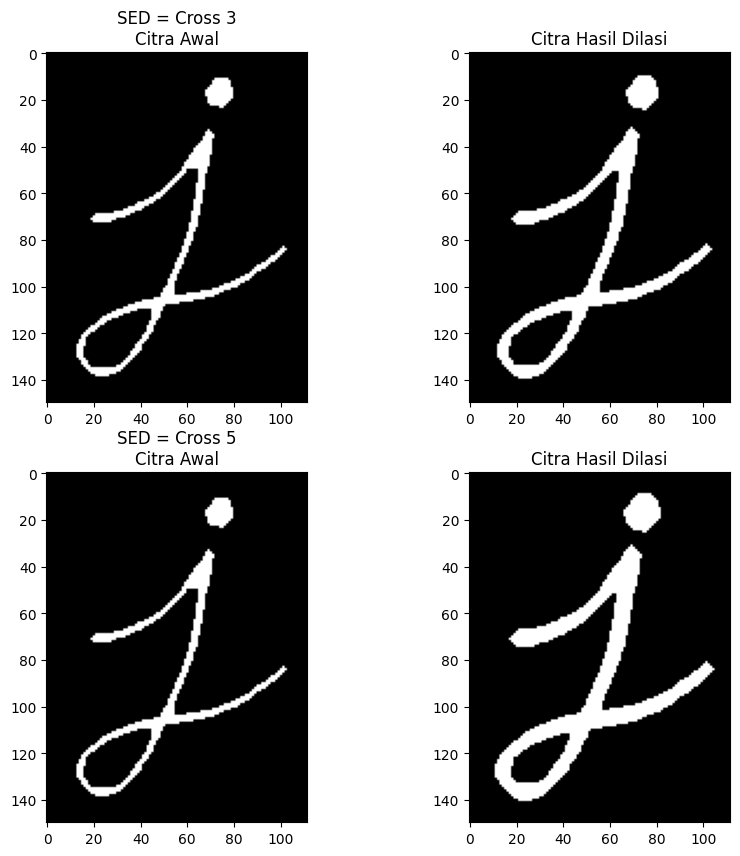

In [ ]:
# 1. Buat kernel Cross
kernel_cross_3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
kernel_cross_5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# 2. Lakukan dilasi
dilasi_cross_3 = cv2.dilate(img_j, kernel_cross_3, iterations=1)
dilasi_cross_5 = cv2.dilate(img_j, kernel_cross_5, iterations=1)

# 3. Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_j, cmap='gray'), plt.title('SED = Cross 3\nCitra Awal')
plt.subplot(2, 2, 2)
plt.imshow(dilasi_cross_3, cmap='gray'), plt.title('Citra Hasil Dilasi')

plt.subplot(2, 2, 3)
plt.imshow(img_j, cmap='gray'), plt.title('SED = Cross 5\nCitra Awal')
plt.subplot(2, 2, 4)
plt.imshow(dilasi_cross_5, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()

**Tugas 10: Dilasi dengan SE Circular (3x3 dan 5x5)**

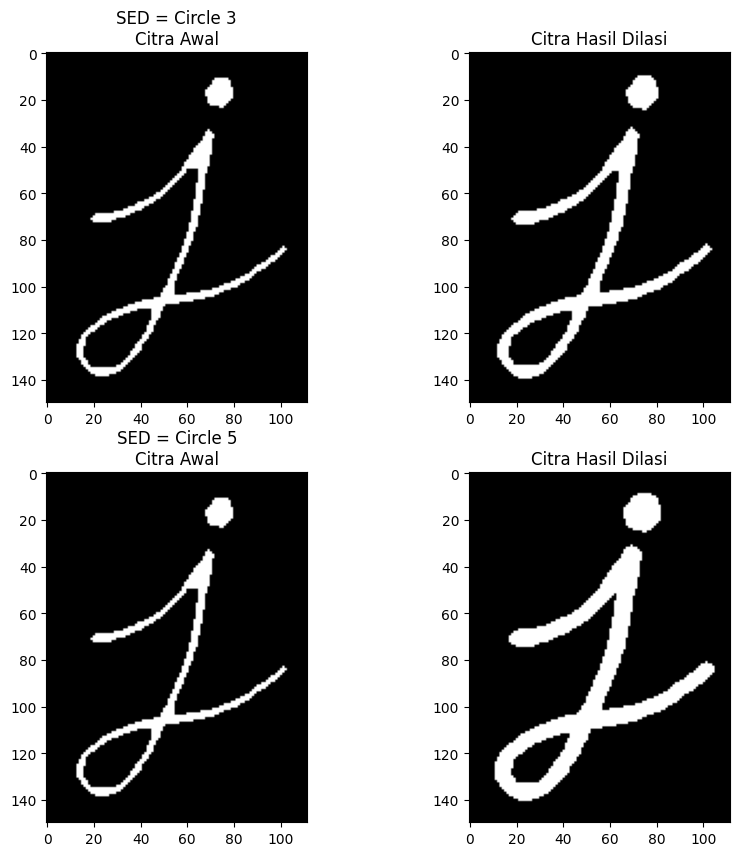

In [ ]:
# 1. Buat kernel Circular (Ellipse)
kernel_circle_3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel_circle_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# 2. Lakukan dilasi
dilasi_circle_3 = cv2.dilate(img_j, kernel_circle_3, iterations=1)
dilasi_circle_5 = cv2.dilate(img_j, kernel_circle_5, iterations=1)

# 3. Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_j, cmap='gray'), plt.title('SED = Circle 3\nCitra Awal')
plt.subplot(2, 2, 2)
plt.imshow(dilasi_circle_3, cmap='gray'), plt.title('Citra Hasil Dilasi')

plt.subplot(2, 2, 3)
plt.imshow(img_j, cmap='gray'), plt.title('SED = Circle 5\nCitra Awal')
plt.subplot(2, 2, 4)
plt.imshow(dilasi_circle_5, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()

**Tugas 11: Erosi dengan SE Rectangle (3x5 dan 5x7)**

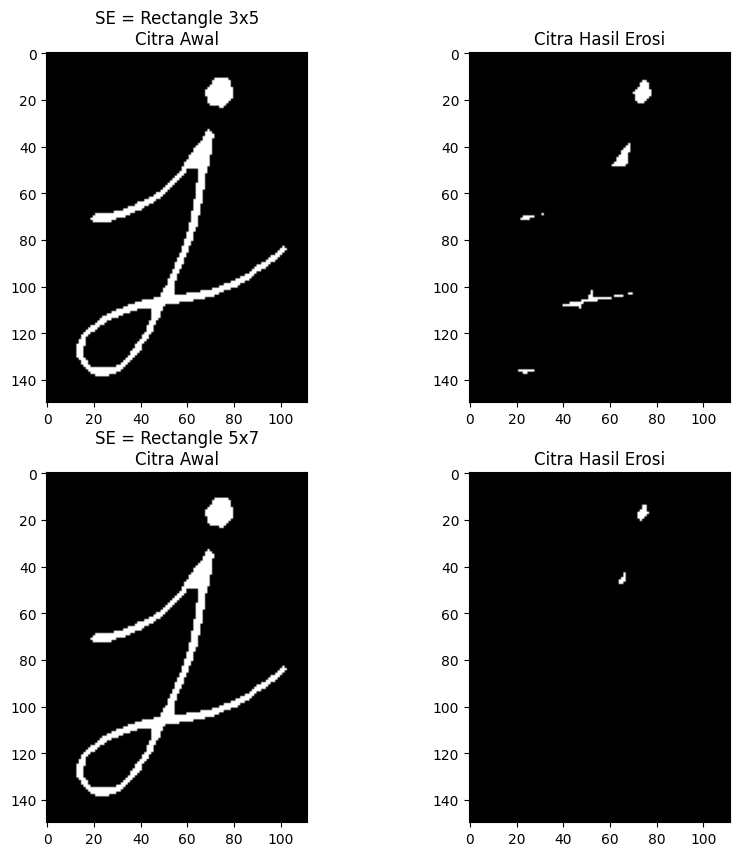

In [ ]:
# 1. Buat kernel Rectangle
# Format: (lebar, tinggi) atau (cols, rows)
# Rectangle 3x5 -> 3 baris, 5 kolom
kernel_rect_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
# Rectangle 5x7 -> 5 baris, 7 kolom
kernel_rect_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 5))

# 2. Lakukan erosi
erosi_rect_3x5 = cv2.erode(img_j, kernel_rect_3x5, iterations=1)
erosi_rect_5x7 = cv2.erode(img_j, kernel_rect_5x7, iterations=1)

# 3. Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_j, cmap='gray'), plt.title('SE = Rectangle 3x5\nCitra Awal')
plt.subplot(2, 2, 2)
plt.imshow(erosi_rect_3x5, cmap='gray'), plt.title('Citra Hasil Erosi')

plt.subplot(2, 2, 3)
plt.imshow(img_j, cmap='gray'), plt.title('SE = Rectangle 5x7\nCitra Awal')
plt.subplot(2, 2, 4)
plt.imshow(erosi_rect_5x7, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

**Tugas 12: Erosi dengan SE Line Vertikal (3 dan 5)**

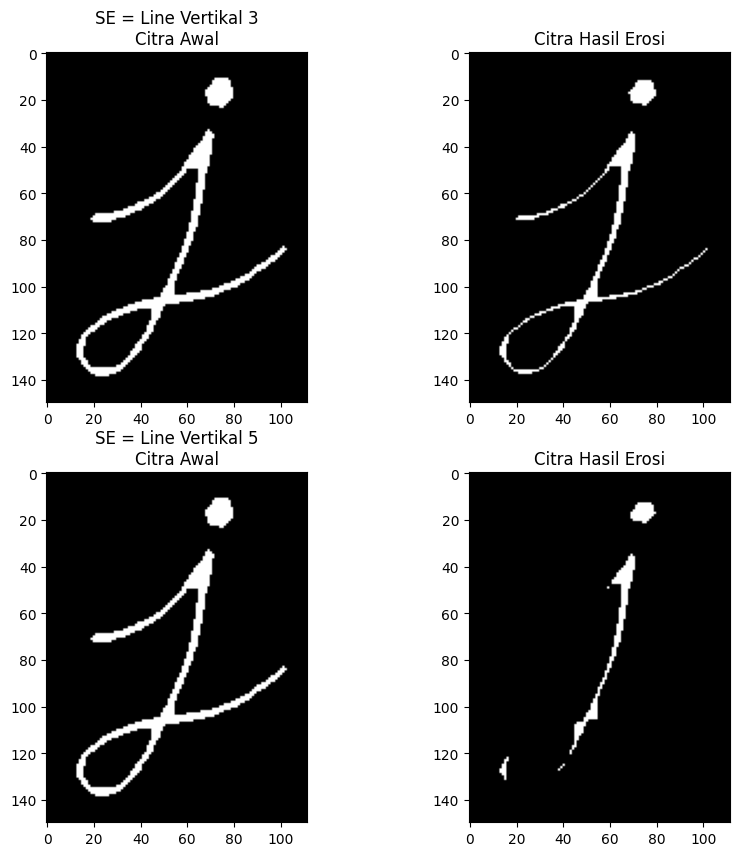

In [ ]:
# 1. Buat kernel Line Vertikal
# Garis vertikal panjang 3 -> lebar 1, tinggi 3
kernel_line_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
# Garis vertikal panjang 5 -> lebar 1, tinggi 5
kernel_line_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

# 2. Lakukan erosi
erosi_line_3 = cv2.erode(img_j, kernel_line_3, iterations=1)
erosi_line_5 = cv2.erode(img_j, kernel_line_5, iterations=1)

# 3. Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_j, cmap='gray'), plt.title('SE = Line Vertikal 3\nCitra Awal')
plt.subplot(2, 2, 2)
plt.imshow(erosi_line_3, cmap='gray'), plt.title('Citra Hasil Erosi')

plt.subplot(2, 2, 3)
plt.imshow(img_j, cmap='gray'), plt.title('SE = Line Vertikal 5\nCitra Awal')
plt.subplot(2, 2, 4)
plt.imshow(erosi_line_5, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()